#### NAME:
#### Stuent ID:

[ write your name and student id]

# Assignment 1

### CS303B Artificial Intelligence for Non Computing Major

#### Total Marks 10 (out of 100 marks for the course)

#### Due Date: 2 October 2019 (10/2/2019) print your assignment and hand in at the beginning of the lecture. 

#### Grading procedure
The grading procedure will be based on the printed document you hand in AND your ability to explain your solutions. The discussion of the coding solution will take place during a 5 minute discussion in the practicals. 

*** Important *** please do not print the pages in the assignment which are provided for explaination. You should only print the pages which have your answers.

#### Penalty for plagarism
Any plagarism will result in applying the school policy (0 marks for the assignment the first time, 0 marks for the course the second time.

#### DECLARATION: I confirm that this assignment is entirely my own work and not copied from or shared with other students.

#### SIGN HERE:

## Question 1

This is a theory question - no coding is required.

You need to trace the nodes visited and path returned by tree search manually on paper for the following graph.

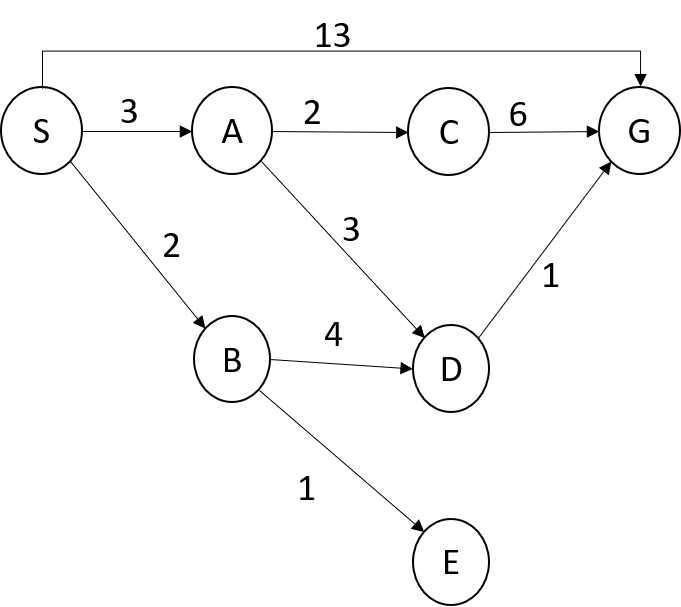

We have a list of heuristic values that estimate the distance to the goal node as follows:
- $h(S)=6$ 
- $h(A)=0$ 
- $h(B)=6$ 
- $h(C)=4$ 
- $h(D)=1$ 
- $h(E)=10$ 
- $h(G)=0$ 

a) Breadth First Search (BFS)
- Order of nodes expanded:
- Path found:
- Path cost:

[write your answser here...]

b) Uniform Cost Search (UCS)
- Order of nodes expanded:
- Path found:
- Path cost:

[write your answser here...]

c) Greedy Heursitic (best first search)
- Order of nodes expanded:
- Path found:
- Path cost:

[write your answser here...]

d) A* hueristic
- Order of nodes expanded:
- Path found:
- Path cost:

[write your answser here...]

e) Is hueristic $h(n)$ admissible and why?

[write your answser here...]

d) Is hueristic $h(n)$ consistent and why?

[write your answser here...]

e) Give an example of a heuristic that is admissable but not consistent.

[write your answser here...]

## Question 2

### Implementation 

Search for route planning.

This question uses the implementations of a search problem definition and the algorithms in the file [search.py](https://github.com/aimacode/aima-python/blob/master/search.py). For further information and other implementation code from the textbook see https://github.com/aimacode. 

Important: To answer this question you should implement your solution using this library and the relevant files are copied locally in the assignment directory (with some minor changes).

First import the libraries located in the directory ``./source_code`` (the symbol ``./`` means the current directory).

In [3]:
import sys
sys.path.insert(0,'./source_code') 

from search import *
from notebook import psource, show_map, simple_show_map # for formatting code to display in jupyter notebooks


Note on installing required libraries:  in the rest of this notebook we use ipythonblocks (it is referenced in the above import of psource) to view code nicely formatted.

If you don't have this library then you can run the shell command "pip install ipythonbocks", and also install other libraries in the same way using pip.

#### Problem Solving Agent Program

An agent program implements the reasoning undertaken by an agent. 

In the library we use a problem solving agent with a specific agent program is implemented as follows.

The SimpleProblemSolvingAgentProgram class has six methods:  

* `__init__(self, intial_state=None)`: This is the `contructor` of the class and is the first method to be called when the class is instantiated. It takes in a keyword argument, `initial_state` which is initially `None`. The argument `initial_state` represents the state from which the agent starts.

* `__call__(self, percept)`: This method updates the `state` of the agent based on its `percept` using the `update_state` method. It then formulates a `goal` with the help of `formulate_goal` method and a `problem` using the `formulate_problem` method and returns a sequence of actions to solve it (using the `search` method).

* `update_state(self, percept)`: This method updates the `state` of the agent based on its `percept`.

* `formulate_goal(self, state)`: Given a `state` of the agent, this method formulates the `goal` for it.

* `formulate_problem(self, state, goal)`: It is used in problem formulation given a `state` and a `goal` for the `agent`.

* `search(self, problem)`: This method is used to search a sequence of `actions` to solve a `problem`.


In [4]:
#With source code for abstract class:
psource(SimpleProblemSolvingAgentProgram)

The following notes describe the process of implementing a search agent program to solve search problems.

#### Search Problem Implementation

As seen in the lectures and practicals, to apply search to solve problems requires modelling the problem in a specific way.

A model for applying search to solve problems requires specifying the following elements:
- States
- Initial state
- Actions
- Tranisition model
- Goal test
- Path cost

(see page 73 of the text Russel and Norvig, 2016).

The implementation is defined as follows.

The `Problem` class has six methods.

* `__init__(self, initial, goal)` : This is what is called a `constructor`. It is the first method called when you create an instance of the class as `Problem(initial, goal)`. The variable `initial` specifies the initial state $s_0$ of the search problem. It represents the beginning state. From here, our agent begins its task of exploration to find the goal state(s) which is given in the `goal` parameter.


* `actions(self, state)` : This method returns all the possible actions agent can execute in the given state `state`.


* `result(self, state, action)` : This returns the resulting state if action `action` is taken in the state `state`. This `Problem` class only deals with deterministic outcomes. So we know for sure what every action in a state would result to.


* `goal_test(self, state)` : Return a boolean for a given state - `True` if it is a goal state, else `False`.


* `path_cost(self, c, state1, action, state2)` : Return the cost of the path that arrives at `state2` as a result of taking `action` from `state1`, assuming total cost of `c` to get up to `state1`.


* `value(self, state)` : This acts as a bit of extra information in problems where we try to optimise a value when we cannot do a goal test.


In [3]:
# And the general implementation is as follows - the actions and other not implementated methods 
# specified in particular implementations. In the next section we describe implementation for the problem of
# search from one node to another in a graph.
psource(Problem)

#### General Tree Search

Once a problem is defined tree search algorithms are able to applied to a search tree structure.

The search tree is implemented a tree structure with nodes. It has the following 9 methods.

The first is the `__init__` method.

* `__init__(self, state, parent, action, path_cost)` : This method creates a node. `parent` represents the node that this is a successor of and `action` is the action required to get from the parent node to this node. `path_cost` is the cost to reach current node from parent node.

The next 4 methods are specific `Node`-related functions.

* `expand(self, problem)` : This method lists all the neighbouring(reachable in one step) nodes of current node. 

* `child_node(self, problem, action)` : Given an `action`, this method returns the immediate neighbour that can be reached with that `action`.

* `solution(self)` : This returns the sequence of actions required to reach this node from the root node. 

* `path(self)` : This returns a list of all the nodes that lies in the path from the root to this node.

The remaining 4 methods override standards Python functionality for representing an object as a string, the less-than ($<$) operator, the equal-to ($=$) operator, and the `hash` function.

* `__repr__(self)` : This returns the state of this node.

* `__lt__(self, node)` : Given a `node`, this method returns `True` if the state of current node is less than the state of the `node`. Otherwise it returns `False`.

* `__eq__(self, other)` : This method returns `True` if the state of current node is equal to the other node. Else it returns `False`.

* `__hash__(self)` : This returns the hash of the state of current node.

In [4]:
# The implementation of Node is as follows:
psource(Node)

#### Implementation of graph problems

The class Problem is implemented to define the specific implementation of graph problems where a path is found between nodes in a graph.

The function h is a heuristic to be used in search algorithms such as greedy and A*.

In [23]:
psource(GraphProblem)

#### Problem Definition

We will solve the problem given in the textbook and lectures on finding routes through Romania.

This can be modelled as an undirected graph as follows (see [search.ipynb](https://github.com/aimacode/aima-python/blob/master/search.ipynb) for additional information).


In [5]:
romania_map = UndirectedGraph(dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142)))

romania_map.locations = dict(
    Arad=(91, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531))



Can draw the graph as follows.

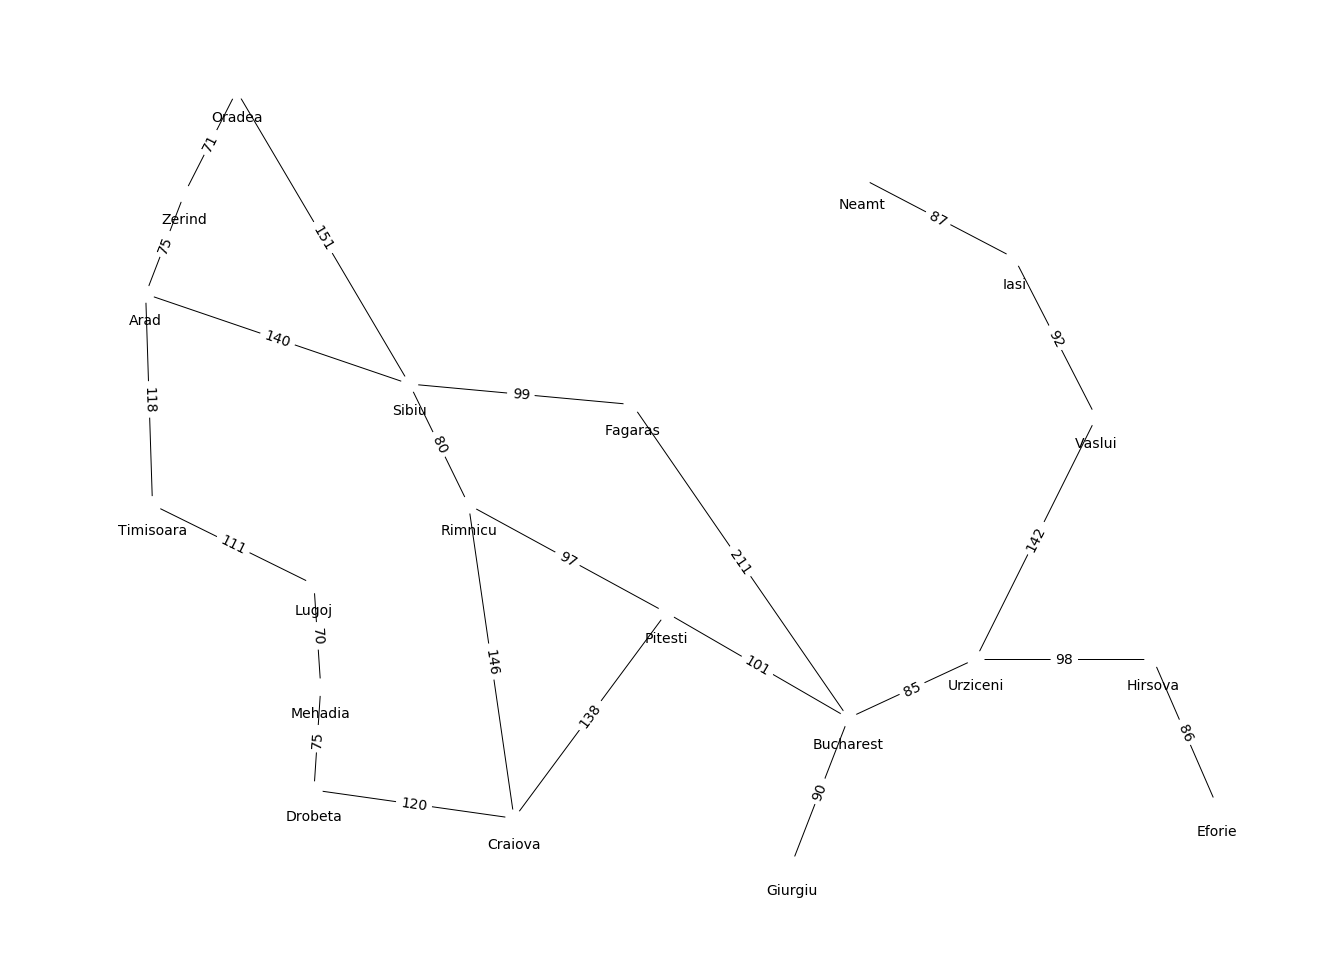

In [6]:
import warnings
warnings.filterwarnings("ignore") # ignore depreciation warnings

# Draw graph:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in romania_map.locations.keys()}
node_positions = romania_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in romania_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in romania_map.graph_dict.items() for k2, v2 in v.items()}

graph_data = {  'graph_dict' : romania_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }
simple_show_map(graph_data)

The first node **Arad** has three neighbours named **Zerind**, **Sibiu**, **Timisoara**. Each of these nodes are 75, 140, 118 units apart from **Arad** respectively. And the same goes with other nodes.

And `romania_map.locations` contains the positions of each of the nodes. the straight line distance (different from the one provided in `romania_map`) between two cities as a hueristic in algorithms like A\*-search.

**Define a problem:**
Now it's time to define our problem. We will define it by passing `initial`, `goal`, `graph` to `GraphProblem`. So, our problem is to find the goal state starting from the given initial state on the provided graph. 

To start from **Arad** and try to find **Bucharest** in our romania_map is done as follows.

In [7]:
# Define a graph problem with a start state at Arad, and a goal state at Bucharest
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)

### 2.a) Breadth First Search
Now that the problem is implemented we can apply the provided search algorithms to solve the problem.

For example, with breadth first search to find the final node (which recall is a solution that contains a path from the start to the finish) as follows.

In [12]:
plan_bfs = breadth_first_tree_search(romania_problem)
type(plan_bfs)

search.Node

In [13]:
# the final state is included in the returned node along with other data related to the search
print ("State:", plan_bfs.state)

State: Bucharest


In [14]:
# get steps from start to goal state - ie the "solution"
plan_bfs.solution()

['Sibiu', 'Fagaras', 'Bucharest']

Get the cost of this path 

In [15]:
your code here...

SyntaxError: invalid syntax (<ipython-input-15-8144ef7aa431>, line 1)

Is BFS optimal and/or complete? Explain.

[your answer here]

### 2.b) Depth First Tree Search

First run depth first tree search:

In [16]:
plan_dfs = depth_first_tree_search(romania_problem)

KeyboardInterrupt: 

What happened? 


Hint: you can view the status (and order) of running a cell in a jupyter notebook by looking at the 
In [...] and
Out [...]
The number refers to the order of execution and if there is a ``*`` it means that the code is still running.

[write your explaination here]

Is DFS tree search optimal and/or complete? Explain.

### 2.c) Depth First Graph Search

In [ ]:
plan_dfs = depth_first_graph_search(romania_problem)

In [15]:
plan_dfs.solution()

['Timisoara', 'Lugoj', 'Mehadia', 'Drobeta', 'Craiova', 'Pitesti', 'Bucharest']

What is the difference between this version of depth first search and the previous version?

[your answer here...]

What is the cost of the path?

In [ ]:
your code here...

Is DFS graph search optimal and/or complete? Explain.

[your answer here...]

Why would you apply DFS tree search and how could the problem we saw be overcome?

[your answer here...]

### 2.d) Depth Limited Search and Iterative Deepening

Apply depth limited search with depth = 1, 2, and, 3.
Apply iterative deepening.

In [36]:
#your code here...


Explain what happened in each test.

[your answer here...]

Is depth limited search complete/optimal? Explain.

[your answer here]

### 2.e) Uniform Cost Search

Apply uniform cost search.

In [28]:
your code here...

Is uniform cost search complete/optimal? Explain.

[your answer here...]

### 2. d) Greedy Heuristic Graph Search

Apply Greedy Heuristic Search by setting the hueristic (h function) to be the straight line distance from the nodes state to the goal (this is already done in the problem definition for graph problem that is provided above).

***Note*** The lambda keyword allows one to concisely define an anonymous function - the function returns the straight line distance from a node to the final destination for the romania problem (here it is not strictly necessary to use lambda as  could have just passed the function from romania.problem directly but is provided for explaination).

In [55]:
final_node = greedy_best_first_graph_search(romania_problem, f = lambda node : romania_problem.h(node))
final_node.solution()

['Sibiu', 'Fagaras', 'Bucharest']

Explain how this solution was determined using the definition of the heuristic function.

[your answer here]

Is the solution optimal? Why/Why not. 

[your answer here]

### 2. e) A* Search

Apply A* search with the above hueristic. 

In [ ]:
your code here

Describe the way A* search handles the frontier and why the solution is complete and optimal.

[your answer here]

Define the term admissable in your own words and give an example of an inadmissable hueristic and an admissible heuristic that could be used in a GraphProblem as we just looked at (apart from euclidean distance).

[your answer here]